In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from source.mcmc import MCMC
from source.mcmc_state import State

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

    # The for loop is to allow for the option of plotting multiple chains on the same chart
    # (It just kinda looks cool)
print(f"Starting Markov Chain")
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
start = State(start)
    #start = [.25, .74, 68]
g_cov_test = np.diag([.01, .01, .1, .01])
markov_chain = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=g_cov_test)

markov_chain.make_chain(1000)

print(markov_chain.chain)

Starting Markov Chain
Printing initial state: (Omega_m: 0.3719679763864834, Omega_L: 0.12117840680176395, H0: 62.91848054377661, M: -19.70586819124554)
Chain after addition of initial state: self.chain=array([<State Omega_m: 0.37, Omega_L: 0.12, H0: 62.92, M: -19.71>],
      dtype=object) type(self.chain)=<class 'numpy.ndarray'>
len(self.chain)=1 self.chain.shape=(1,)
[<State Omega_m: 0.37, Omega_L: 0.12, H0: 62.92, M: -19.71>
 <State Omega_m: 0.27, Omega_L: 0.29, H0: 63.16, M: -19.86>
 <State Omega_m: 0.27, Omega_L: 0.22, H0: 62.89, M: -19.64> ...
 <State Omega_m: 0.48, Omega_L: 0.93, H0: 62.57, M: -19.64>
 <State Omega_m: 0.48, Omega_L: 1.04, H0: 62.12, M: -19.61>
 <State Omega_m: 0.51, Omega_L: 0.89, H0: 62.13, M: -19.71>]


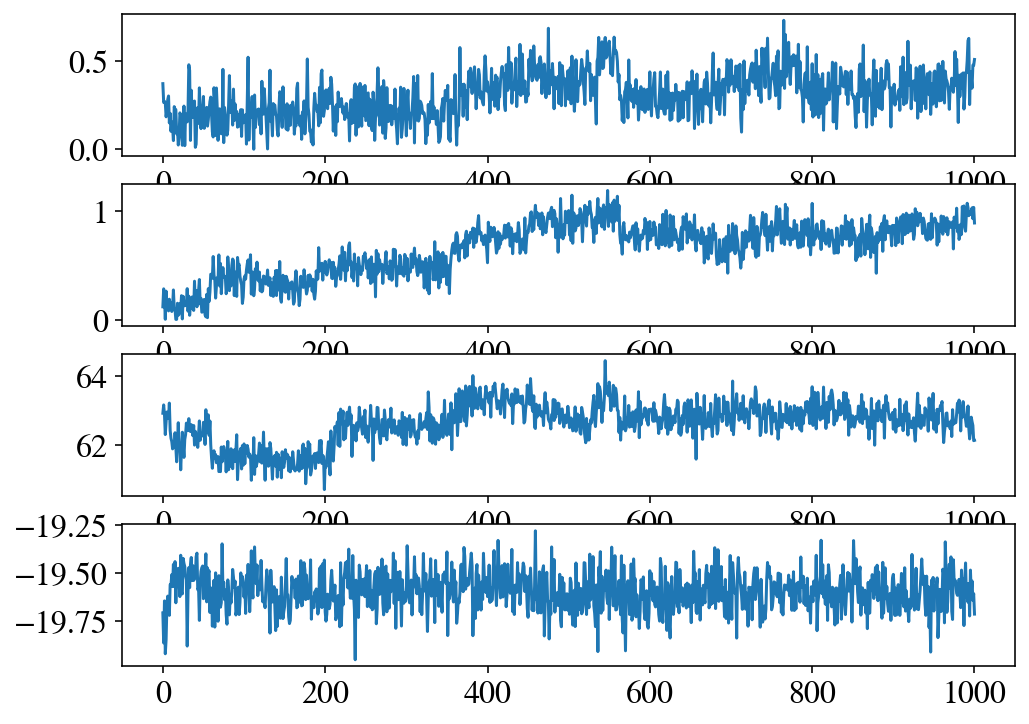

In [2]:
fig, ax = plt.subplots(4,1)

ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

In [4]:
cov = np.cov(markov_chain.chain.T)
alpha= .1
cov*=alpha
print(cov)

[<State Omega_m: 0.37, Omega_L: 0.12, H0: 62.92, M: -19.71>
 <State Omega_m: 0.27, Omega_L: 0.29, H0: 63.16, M: -19.86>
 <State Omega_m: 0.27, Omega_L: 0.22, H0: 62.89, M: -19.64> ...
 <State Omega_m: 0.48, Omega_L: 0.93, H0: 62.57, M: -19.64>
 <State Omega_m: 0.48, Omega_L: 1.04, H0: 62.12, M: -19.61>
 <State Omega_m: 0.51, Omega_L: 0.89, H0: 62.13, M: -19.71>]
[<State Omega_m: 0.37, Omega_L: 0.12, H0: 62.92, M: -19.71>
 <State Omega_m: 0.27, Omega_L: 0.29, H0: 63.16, M: -19.86>
 <State Omega_m: 0.27, Omega_L: 0.22, H0: 62.89, M: -19.64> ...
 <State Omega_m: 0.48, Omega_L: 0.93, H0: 62.57, M: -19.64>
 <State Omega_m: 0.48, Omega_L: 1.04, H0: 62.12, M: -19.61>
 <State Omega_m: 0.51, Omega_L: 0.89, H0: 62.13, M: -19.71>]


TypeError: unsupported operand type(s) for +: 'State' and 'State'

In [ ]:
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
markov_chain2 = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=cov)

markov_chain2.make_chain(10000)

In [ ]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain2.chain[:,0])
ax[1].plot(markov_chain2.chain[:,1])
ax[2].plot(markov_chain2.chain[:,2])
ax[3].plot(markov_chain2.chain[:,3])
plt.show()

In [ ]:
plt.hist2d(markov_chain2.chain[500:,0], markov_chain2.chain[500:,1], bins=(50, 50), cmap=plt.cm.jet)
plt.show()